In [2]:
%matplotlib notebook

Daeheon
==

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
# pandas_datareader 패키지의 DataReader라는 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능을 제공합니다.
import pandas_datareader.data as web

# 사용할 스타일을 설정하는 것인데, 이 외에도 많은 스타일이 있습니다. 
style.use('ggplot')

# 기준날자를 설정합니다.
start = dt.datetime(2000,1,1)
end = dt.datetime(2018,12,31)

# pandas_datareader로 온라인에서 바로 데이터를 데이터프레임형식으로 받아옵니다.
df = web.DataReader('TSLA', 'yahoo', start, end)
# 앞 5개 자료를 출력해 봅니다.
print (df.head(5))

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


In [4]:
#df.to_csv('tsla.csv')

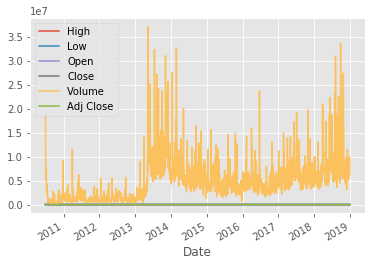

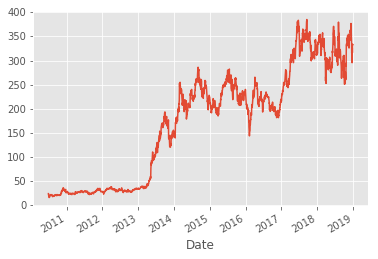

In [6]:
%matplotlib inline
# matplotlib 으로 그래프를 plot 하고 
df.plot()
# 역시 matplotlib 으로 그래프를 출력합니다. 
plt.show()

# 특정한 행을 지정하여 plot 하고 출력해 봅니다. 
df['Adj Close'].plot()
plt.show()

                  High         Low        Open       Close   Volume  \
Date                                                                  
2018-12-24  314.500000  295.200012  313.500000  295.390015  5559900   
2018-12-26  326.970001  294.089996  300.000000  326.089996  8163100   
2018-12-27  322.170013  301.500000  319.839996  316.130005  8575100   
2018-12-28  336.239990  318.410004  323.100006  333.869995  9939000   
2018-12-31  339.209991  325.260010  337.790009  332.799988  6302300   

             Adj Close     100ma  
Date                              
2018-12-24  295.390015  318.4833  
2018-12-26  326.089996  318.2488  
2018-12-27  316.130005  317.9284  
2018-12-28  333.869995  317.8472  
2018-12-31  332.799988  317.3795  


<IPython.core.display.Javascript object>


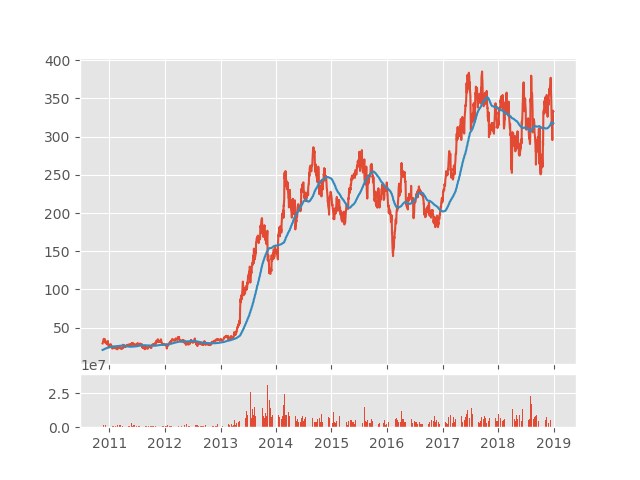

In [7]:
%matplotlib notebook
# '100ma' 부분은 특정한 열을 생성하는 것이고, 
# 그 뒷부분은 어떤 전처리를 할 지인데, Adj Close의 평균을 해 보았습니다. 
# 왜 df.head(100) 은 안 출력되는지도 이해해 보세요.
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.dropna(inplace=True)
print(df.tail())

# 여러개의 sub-plot
# (6,1) -> 그리드 사이즈 (6행 1열)
# (0,0) -> 시작 포인트
#
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)

# 위에서 인덱스를 지정해 뒀기 때문에 불러올 수 있습니다. (그냥 date 지정해도 무방)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()